In [1]:
from matplotlib import  pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
def create_data(n):
    '''
    创建线性可分数据集

    :param n: 正例样本的个数（同时也是负例样本的个数）
    :return: 返回一个线性可分数据集，数据集大小为 2*n
    '''
    np.random.seed(1)
    x_11=np.random.randint(0,100,(n,1)) # 第一组：第一维坐标值
    x_12=np.random.randint(0,100,(n,1,))# 第一组：第二维坐标值
    x_13=20+np.random.randint(0,10,(n,1,))#第一组： 第三维坐标值
    
    x_21=np.random.randint(0,100,(n,1)) # 第二组：第一维坐标值
    x_22=np.random.randint(0,100,(n,1)) # 第二组：第二维坐标值
    x_23=10-np.random.randint(0,10,(n,1,)) # 第二组：第三维坐标值

    new_x_12=x_12*np.sqrt(2)/2-x_13*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_13=x_12*np.sqrt(2)/2+x_13*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_22=x_22*np.sqrt(2)/2-x_23*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_23=x_22*np.sqrt(2)/2+x_23*np.sqrt(2)/2## 沿第一维轴旋转45度

    plus_samples=np.hstack([x_11,new_x_12,new_x_13,np.ones((n,1))]) # 拼接成正例数据集
    minus_samples=np.hstack([x_21,new_x_22,new_x_23,-np.ones((n,1))]) # 拼接成负例数据集
    samples=np.vstack([plus_samples,minus_samples]) # 拼接成完整数据集
    np.random.shuffle(samples)  # 混洗数据
    return samples

def plot_samples(ax,samples):
    '''
    绘制样本点

    :param ax: 绘制图形所在的 Axes
    :param samples: 样本数据集
    :return: None
    '''
    Y=samples[:,-1] # 标记信息
    position_p=Y==1 ## 正类位置
    position_m=Y==-1 ## 负类位置
    ax.scatter(samples[position_p,0],samples[position_p,1],
        samples[position_p,2],marker='+',label='+',color='b') # 绘制正类样本点
    ax.scatter(samples[position_m,0],samples[position_m,1],
        samples[position_m,2],marker='^',label='-',color='y') # 绘制负类样本点

def run_plot_samples():
    '''
    绘制线性可分数据集

    :return: None
    '''
    fig=plt.figure()
    ax=Axes3D(fig)
    data=create_data(100) # 产生线性可分数据集
    plot_samples(ax,data)
    ax.legend(loc='best')
    plt.show()

In [3]:
def perceptron(train_data,eta,w_0,b_0):
    x = train_data[:,:-1]  # x 数据
    y = train_data[:,-1]  #  对应的标记
    y = y.reshape(len(y), 1)
    w=w_0; b=b_0
    step_num=0
     
    while True:
        step_num += 1
        if step_num>=10000000:
            print("failed!,step_num =%d"%step_num)
            return
        
        y_hat = np.dot(x, w) + b #计算分类点
        wrong_point = (y_hat * y) <= 0
        
        if wrong_point.sum() != 0:               #如果存在误分类点
            w = w + eta * np.dot(x.T, wrong_point * y)  # 梯度下降
            b = b + eta * (wrong_point * y).sum()      # 梯度下降
        else:                            # 如果没有误分类点
            break
        
    return (w,b,step_num)

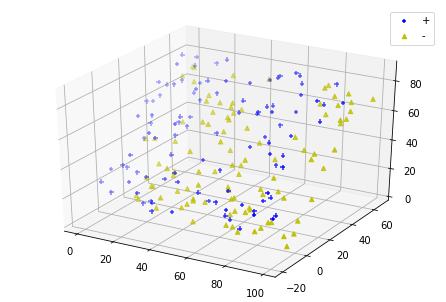

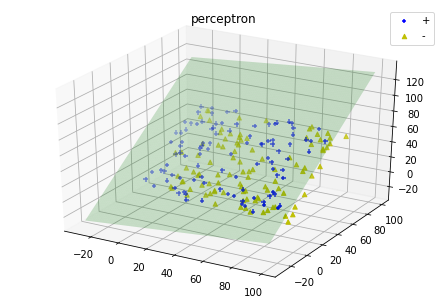

In [4]:
def creat_hyperplane(x,y,w,b):
    '''
    创建分离超平面

    :return: 分离超平面上的点的z坐标组成的数组
    '''
    return (-w[0][0]*x-w[1][0]*y-b)/w[2][0] # w0*x+w1*y+w2*z+b=0

def run_perceptron():
    data=create_data(100) #产生线性可分数据集
    eta, w_0, b_0=0.1, np.ones((3,1),dtype=float), 1 # 初始化 学习率、权重、 b
    w,b,num=perceptron(data,eta,w_0,b_0) # 执行感知机的原始形式
    ### 绘图
    fig=plt.figure()
    plt.suptitle("perceptron")
    ax=Axes3D(fig)

    ### 绘制样本点
    plot_samples(ax,data)

    ##  绘制分离超平面
    x=np.linspace(-30,100,100)  # 分离超平面的 x坐标数组
    y=np.linspace(-30,100,100) # 分离超平面的 y坐标数组
    x,y=np.meshgrid(x,y) # 划分网格
    z=creat_hyperplane(x,y,w,b)  # 分离超平面的 z坐标数组
    ax.plot_surface(x, y, z, rstride=1, cstride=1,color='g',alpha=0.2)

    ax.legend(loc="best")
    plt.show()

run_plot_samples()
run_perceptron()

In [5]:
def create_data_no_linear(n):
    '''
    创建线性不可分数据集

    :param n: 正例样本的个数（同时也是负例样本的个数）
    :return: 返回一个线性不可分数据集，数据集大小为 2*n
    '''
    np.random.seed(1)
    x_11=np.random.randint(0,100,(n,1))# 第一组：第一维坐标值
    x_12=np.random.randint(0,100,(n,1,))# 第一组：第二维坐标值
    x_13=10+np.random.randint(0,10,(n,1,))#第一组： 第三维坐标值
    
    x_21=np.random.randint(0,100,(n,1))# 第二组：第一维坐标值
    x_22=np.random.randint(0,100,(n,1))# 第二组：第二维坐标值
    x_23=20-np.random.randint(0,10,(n,1,)) # 第二组：第三维坐标值

    new_x_12=x_12*np.sqrt(2)/2-x_13*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_13=x_12*np.sqrt(2)/2+x_13*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_22=x_22*np.sqrt(2)/2-x_23*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_23=x_22*np.sqrt(2)/2+x_23*np.sqrt(2)/2## 沿第一维轴旋转45度

    plus_samples=np.hstack([x_11,new_x_12,new_x_13,np.ones((n,1))])# 拼接成正例数据集
    minus_samples=np.hstack([x_21,new_x_22,new_x_23,-np.ones((n,1))])# 拼接成负例数据集
    samples=np.vstack([plus_samples,minus_samples])# 拼接成完整数据集
    np.random.shuffle(samples)  # 混洗数据
    return samples

def run_plot_samples_no_linear():
    data=create_data_no_linear(100)# 产生线性不可分数据集
    fig=plt.figure()
    ax=Axes3D(fig)
    plot_samples(ax,data)
    ax.legend(loc='best')
    plt.show()

In [27]:
def perceptron_dual(train_data,eta,alpha_0,b_0):
    x = train_data[:,:-1]  # x 数据
    y = train_data[:,-1]  #  对应的分类
    y = y.reshape((len(y)), 1)
    alpha = alpha_0; b = b_0
    step_num=0
            
    while True:
        step_num += 1
        if step_num>=10000:
            print("failed!,step_num =%d"%step_num)
            return
        
        w = np.dot(x.T, alpha * y)
        y_hat = np.dot(x, w) + b #计算分类点
        wrong_point = (y_hat * y) <= 0
        
        if wrong_point.sum() != 0:               #如果存在误分类点
            alpha = alpha + eta * wrong_point  # 梯度下降
            b = b + eta * (wrong_point * y).sum()      # 梯度下降
        else:                            # 如果没有误分类点
            break
            
    w = np.dot(x.T, alpha * y)
    return (alpha,b, w, step_num)

w_1,b_1 [[ -43.1       ]
 [-278.94357467]
 [ 264.25585464]] -2583.200000000001
w_2,b_2 [[ -43.7       ]
 [-286.9439318 ]
 [ 269.12484092]] -2726.999999999996


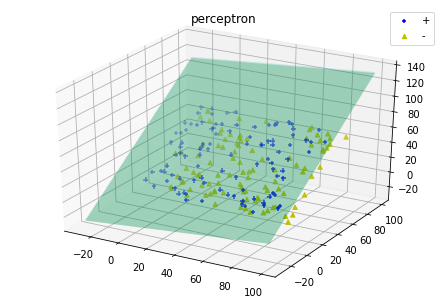

In [28]:
def run_perceptron_dual():
    '''
    对线性可分数据集执行感知机的原始算法和对偶形式算法，并绘制分离超平面

    :return: None
    '''
    data=create_data(100)
    eta,w_0,b_0=0.1,np.ones((3,1),dtype=float),1
    w_1,b_1,num_1=perceptron(data,eta,w_0,b_0) ##执行原始形式的算法
    alpha, b_2, w_2, num_2=perceptron_dual(data,eta=0.1,alpha_0=np.zeros((data.shape[0],1)),
                                            b_0=0) # 执行对偶形式的算法
    

    print("w_1,b_1",w_1,b_1)
    print("w_2,b_2",w_2,b_2)

    ## 绘图
    fig=plt.figure()
    plt.suptitle("perceptron")
    ax=Axes3D(fig)

    ### 绘制样本点
    plot_samples(ax,data)

    ##  绘制分离超平面
    x=np.linspace(-30,100,100)  # 分离超平面的 x坐标数组
    y=np.linspace(-30,100,100) # 分离超平面的 y坐标数组
    x,y=np.meshgrid(x,y) # 划分网格
    z=creat_hyperplane(x,y,w_1,b_1)  # 原始形式算法的分离超平面的 z坐标数组
    z_2=creat_hyperplane(x,y,w_2,b_2)  # 对偶形式算法的分离超平面的 z坐标数组
    ax.plot_surface(x, y, z, rstride=1, cstride=1,color='g',alpha=0.2)
    ax.plot_surface(x, y, z_2, rstride=1, cstride=1,color='c',alpha=0.2)
    ax.legend(loc="best")
    plt.show()
    
run_perceptron_dual()

## 多层神经网络

In [29]:
import numpy as np
from matplotlib import  pyplot as plt

In [30]:
def creat_data_no_linear_2d(n):
        '''
        创建二维的线性不可分数据集

        :param n: 负例的数量
        :return: 线性不可分数据集，数据集大小为 2*n+n/10 （ n/10 是误差点的数量，误差点导致了线性不可分）
        '''
        np.random.seed(1)
        x_11=np.random.randint(0,100,(n,1)) #  第一组：第一维坐标值
        x_12=10+np.random.randint(-5,5,(n,1,))#  第一组：第二维坐标值
        x_21=np.random.randint(0,100,(n,1))#  第二组：第一维坐标值
        x_22=20+np.random.randint(0,10,(n,1))#  第二组：第二维坐标值

        x_31=np.random.randint(0,100,(int(n/10),1))#  第三组：第一维坐标值
        x_32=20+np.random.randint(0,10,(int(n/10),1))#  第三组：第二维坐标值

        new_x_11=x_11*np.sqrt(2)/2-x_12*np.sqrt(2)/2## 沿第一维轴旋转45度
        new_x_12=x_11*np.sqrt(2)/2+x_12*np.sqrt(2)/2## 沿第一维轴旋转45度
        new_x_21=x_21*np.sqrt(2)/2-x_22*np.sqrt(2)/2## 沿第一维轴旋转45度
        new_x_22=x_21*np.sqrt(2)/2+x_22*np.sqrt(2)/2## 沿第一维轴旋转45度
        new_x_31=x_31*np.sqrt(2)/2-x_32*np.sqrt(2)/2## 沿第一维轴旋转45度
        new_x_32=x_31*np.sqrt(2)/2+x_32*np.sqrt(2)/2## 沿第一维轴旋转45度

        plus_samples=np.hstack([new_x_11,new_x_12,np.ones((n,1))]) # 拼接成正例数据集
        minus_samples=np.hstack([new_x_21,new_x_22,-np.ones((n,1))])# 拼接成负例数据集
        err_samples=np.hstack([new_x_31,new_x_32,np.ones((int(n/10),1))])# 拼接成正例数据集，它导致了线性不可分
        samples=np.vstack([plus_samples,minus_samples,err_samples]) # 拼接成数据集
        np.random.shuffle(samples)  # 混洗数据
        return samples
def plot_samples_2d(ax,samples):
            '''
            绘制二维数据集

            :param ax: Axes 实例，用于绘制图形
            :param samples: 二维数据集
            :return: None
            '''
            Y=samples[:,-1]
            position_p=Y==1 ## 正类位置
            position_m=Y==-1 ## 负类位置
            ax.scatter(samples[position_p,0],samples[position_p,1],
                marker='+',label='+',color='b')
            ax.scatter(samples[position_m,0],samples[position_m,1],
                marker='^',label='-',color='y')
def run_plot_samples_2d():
    '''
    绘制二维线性不可分数据集

    :return: None
    '''
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    data=creat_data_no_linear_2d(100) # 生成二维线性不可分数据集
    plot_samples_2d(ax,data)
    ax.legend(loc='best')
    plt.show()

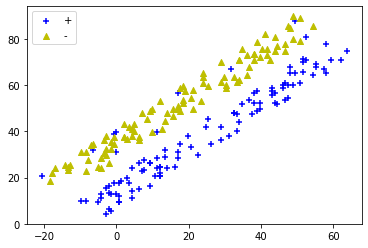

0.9523809523809523


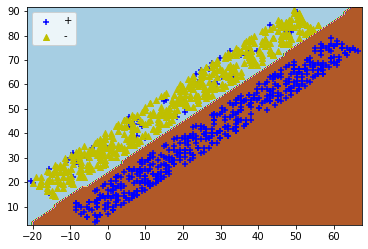

In [31]:
from sklearn.neural_network import MLPClassifier

def predict_with_MLPClassifier(ax,train_data):
        train_x = train_data[:,:-1]
        train_y = train_data[:,-1]
        clf = MLPClassifier(activation='logistic',max_iter=1000)# 构造分类器实例
        clf.fit(train_x,train_y) # 训练分类器
        print(clf.score(train_x,train_y)) # 查看在训练集上的评价预测精度

        ## 用训练好的训练集预测平面上每一点的输出##
        x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 2
        y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 2
        plot_step=1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
            np.arange(y_min, y_max, plot_step))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
        
def run_predict_with_MLPClassifier():
    '''
    用 MLPClassifier 预测线性不可分数据集

    :return: None
    '''
    data=creat_data_no_linear_2d(500) #生成线性不可分数据集
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    predict_with_MLPClassifier(ax,data)
    plot_samples_2d(ax,data)
    ax.legend(loc='best')
    plt.show()
    
run_plot_samples_2d()
run_predict_with_MLPClassifier()

## 应用：不可分数据集

In [32]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import numpy as np
from matplotlib import  pyplot as plt
from sklearn.neural_network import MLPClassifier

In [33]:
## 加载数据集
np.random.seed(0)
iris=datasets.load_iris() # 使用 scikit-learn  自带的 iris 数据集
X=iris.data[:,0:2] # 使用前两个特征，方便绘图
Y=iris.target # 标记值
data=np.hstack((X,Y.reshape(Y.size,1)))
np.random.shuffle(data) # 混洗数据。因为默认的iris 数据集：前50个数据是类别0，中间50个数据是类别1，末尾50个数据是类别2.混洗将打乱这个顺序
X=data[:,:-1]
Y=data[:,-1]
train_x=X[:-30]
test_x=X[-30:] # 最后30个样本作为测试集
train_y=Y[:-30]
test_y=Y[-30:]

In [34]:
def plot_classifier_predict_meshgrid(ax,clf,x_min,x_max,y_min,y_max):
    plot_step = 0.02 # 步长
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired) # 绘图
    
def plot_samples(ax,x,y):
    n_classes = 3
    plot_colors = "bry" # 颜色数组。每个类别的样本使用一种颜色
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax.scatter(x[idx, 0], x[idx, 1], c=color,
                   label=iris.target_names[i], cmap=plt.cm.Paired) # 绘图

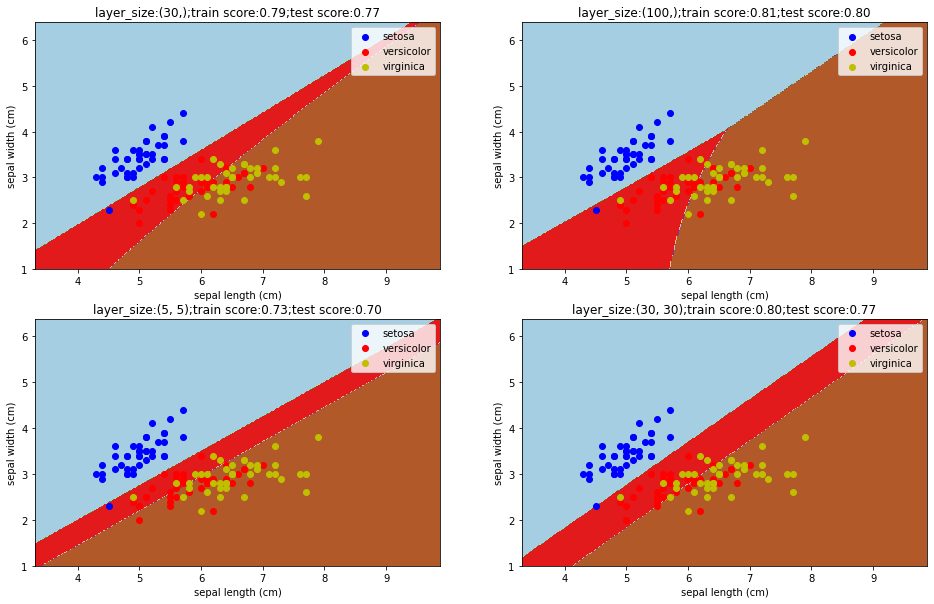

In [57]:
def mlpclassifier_iris_hidden_layer_sizes():
    '''
    使用 MLPClassifier 预测调整后的 iris 数据集。考察不同的 hidden_layer_sizes 的影响

    :return: None
    '''
    fig=plt.figure(figsize=(16, 10))
    hidden_layer_sizes=[(30,),(100,),(5,5),(30,30)] # 候选的 hidden_layer_sizes 参数值组成的数组
    for itx,size in enumerate(hidden_layer_sizes):
        ax=fig.add_subplot(2,2,itx+1)
        classifier=MLPClassifier(activation='logistic',max_iter=10000,
                                 hidden_layer_sizes=size)
        classifier.fit(train_x,train_y)
        train_score=classifier.score(train_x,train_y)
        test_score=classifier.score(test_x,test_y)
        x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 2
        y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 2
        plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
        plot_samples(ax,train_x,train_y)
        ax.legend(loc='best')
        ax.set_xlabel(iris.feature_names[0])
        ax.set_ylabel(iris.feature_names[1])
        ax.set_title("layer_size:%s;train score:%.2f;test score:%.2f"
            %(size,train_score,test_score))
    plt.show()
        
mlpclassifier_iris_hidden_layer_sizes()

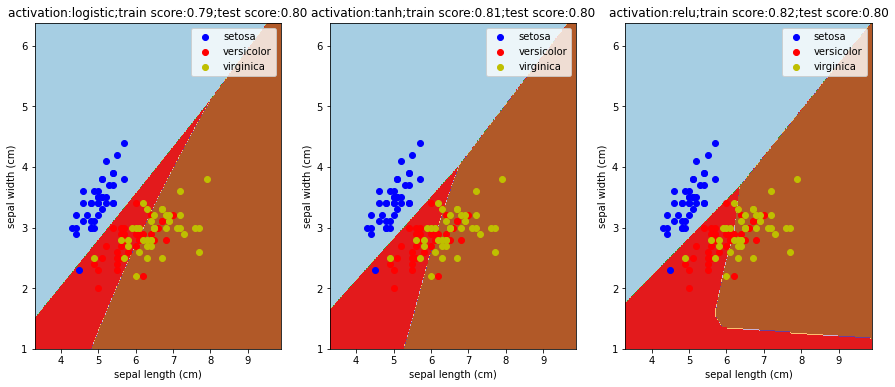

In [51]:
def mlpclassifier_iris_ativations():
    '''
    使用 MLPClassifier 预测调整后的 iris 数据集。考察不同的 activation 的影响

    :return:  None
    '''
    fig=plt.figure(figsize=(15, 6))
    ativations=["logistic","tanh","relu"] # 候选的激活函数字符串组成的列表
    for itx,act in enumerate(ativations):
        ax=fig.add_subplot(1,3,itx+1)
        classifier=MLPClassifier(activation=act,max_iter=10000,
                                 hidden_layer_sizes=(30,))
        classifier.fit(train_x,train_y)
        train_score=classifier.score(train_x,train_y)
        test_score=classifier.score(test_x,test_y)
        x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 2
        y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 2
        plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
        plot_samples(ax,train_x,train_y)
        ax.legend(loc='best')
        ax.set_xlabel(iris.feature_names[0])
        ax.set_ylabel(iris.feature_names[1])
        ax.set_title("activation:%s;train score:%.2f;test score:%.2f"
                     %(act,train_score,test_score))
    plt.show()
    
mlpclassifier_iris_ativations()

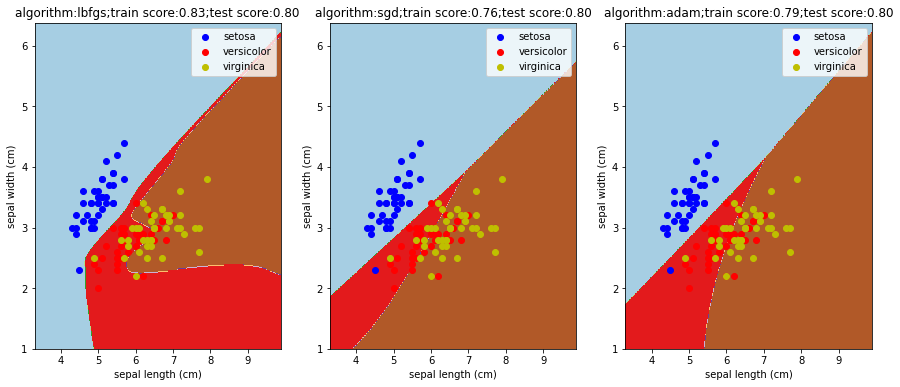

In [56]:
def mlpclassifier_iris_algorithms():
    '''
    使用 MLPClassifier 预测调整后的 iris 数据集。考察不同的 algorithm 的影响

    :return: None
    '''
    fig=plt.figure(figsize=(15, 6))
    algorithms=["lbfgs","sgd","adam"] # 候选的算法字符串组成的列表
    for itx,algo in enumerate(algorithms):
        ax=fig.add_subplot(1,3,itx+1)
        classifier=MLPClassifier(activation="tanh",max_iter=10000,
                                 hidden_layer_sizes=(30,), solver=algo)
        classifier.fit(train_x,train_y)
        train_score=classifier.score(train_x,train_y)
        test_score=classifier.score(test_x,test_y)
        x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 2
        y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 2
        plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
        plot_samples(ax,train_x,train_y)
        ax.legend(loc='best')
        ax.set_xlabel(iris.feature_names[0])
        ax.set_ylabel(iris.feature_names[1])
        ax.set_title("algorithm:%s;train score:%.2f;test score:%.2f"%(algo,train_score,test_score))
    plt.show()
    
mlpclassifier_iris_algorithms()